In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format="retina" # sharper visual for high-res screens
import seaborn as sns
sns.set_context("notebook")

# package use to convert string to other datatype e.g. list, dict, ...
import ast
# Packages for generating polygon
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

import importlib # to reload package dynamically.

#*******************************
# load Ipython autoreload package
%load_ext autoreload
# automatically reload all modules.
# This is in case changes/updates were made to the module.
%autoreload 2
# Custom package to process data
import utils

import warnings
warnings.filterwarnings("ignore")

<hr>
<h1 style="text-align: center">EDA</h1>

In [11]:
import pathlib

# Select years of data to include
years = [2019, 2020]
files = []
for year in years:
    # define the path
    current_directory = pathlib.Path('data/raw/Detroit_911_calls/')
    # define the filename pattern
    name_pattern = f"911_Calls_{year}*.csv"
    # Add match files to the files list
    files += [str(x) for x in current_directory.glob(name_pattern)]
# Print out list of files
[print(file) for file in files]
df = pd.DataFrame()
for file in files:
    df = pd.concat([df, pd.read_csv(file, thousands=",")], axis=0)
df.shape

data/raw/Detroit_911_calls/911_Calls_2019_file0.csv
data/raw/Detroit_911_calls/911_Calls_2020_file0.csv
data/raw/Detroit_911_calls/911_Calls_2020_file1.csv
data/raw/Detroit_911_calls/911_Calls_2020_file2.csv
data/raw/Detroit_911_calls/911_Calls_2020_file3.csv


(1993239, 27)

In [12]:
df

,X,Y,incident_id,agency,incident_address,zip_code,priority,callcode,calldescription,category,...,totalresponsetime,time_on_scene,totaltime,neighborhood,block_id,council_district,longitude,latitude,oid,ObjectId
0,-83.236856,42.386262,201836502933,DPD,Schoolcraft St & Evergreen Rd,48223,3,843030,INVESTIGATE PERSON,INVPERS,...,0.0,3.0,3.0,Schoolcraft Southfield,2.616354e+14,1.0,-83.236856,42.386262,1566423.0,NaN
1,-83.152582,42.420706,201836502934,DPD,Roselawn St & Santa Clara St,48221,2,843020,UNKNOWN PROBLEM,UNKPROB,...,NaN,NaN,20.2,Bagley,2.616354e+14,2.0,-83.152582,42.420706,1566424.0,NaN
2,-83.136803,42.402751,201836502939,DPD,Holmur St & Fenkell St,48238,3,SA,SPECIAL ATTENTION,SPCL ATT,...,0.0,0.9,0.9,Pilgrim Village,2.616353e+14,2.0,-83.136803,42.402751,1566425.0,NaN
3,-83.144960,42.412308,201836502940,DPD,Florence St & Prairie St,48221,2,843020,UNKNOWN PROBLEM,UNKPROB,...,18.7,8.5,27.1,Fitzgerald/Marygrove,2.616354e+14,2.0,-83.144960,42.412308,1566426.0,NaN
4,-83.173139,42.414227,201836502941,DPD,Sorrento St & Grove St,48235,2,811020,AUTO X UNK INJ / IMPAIRED,ACCUNK,...,NaN,NaN,23.7,Harmony Village,2.616354e+14,2.0,-83.173139,42.414227,1566427.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84452,-83.258296,42.429128,202032503881,DPD,W 7 Mile Rd & Lahser Rd,48219,2,345020,PERSON WITH WEAPON,WEAPON,...,NaN,NaN,NaN,Berg-Lahser,2.616354e+14,1.0,-83.258296,42.429128,NaN,84453.0
84453,-83.154077,42.386045,202032503884,DPD,Cherrylawn St & W Davison St,48238,2,TS,TRAFFIC STOP,TRF STOP,...,0.0,8.8,8.8,Davison-Schoolcraft,2.616354e+14,7.0,-83.154077,42.386045,NaN,84454.0
84454,-83.063929,42.414862,202032503886,DPD,E Davison St & Newbern St,48212,2,TS,TRAFFIC STOP,TRF STOP,...,0.0,7.0,7.0,North Campau,2.616351e+14,3.0,-83.063929,42.414862,NaN,84455.0
84455,-83.018099,42.434093,202032503888,DPD,E 7 Mile Rd & Antwerp St,48234,2,TS,TRAFFIC STOP,TRF STOP,...,0.0,10.7,10.7,Nortown,2.616351e+14,3.0,-83.018099,42.434093,NaN,84456.0


In [13]:
df.reset_index(drop=True).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1993239 entries, 0 to 1993238
Data columns (total 27 columns):
 #   Column             Dtype  
---  ------             -----  
 0   X                  float64
 1   Y                  float64
 2   incident_id        int64  
 3   agency             object 
 4   incident_address   object 
 5   zip_code           object 
 6   priority           object 
 7   callcode           object 
 8   calldescription    object 
 9   category           object 
 10  call_timestamp     object 
 11  precinct_sca       object 
 12  respondingunit     object 
 13  officerinitiated   object 
 14  intaketime         float64
 15  dispatchtime       float64
 16  traveltime         float64
 17  totalresponsetime  float64
 18  time_on_scene      float64
 19  totaltime          float64
 20  neighborhood       object 
 21  block_id           float64
 22  council_district   float64
 23  longitude          float64
 24  latitude           float64
 25  oid               

In [14]:
# Drop duplicates (using incident_id)
df.drop_duplicates(subset=["incident_id"], inplace=True, ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1909708 entries, 0 to 1909707
Data columns (total 27 columns):
 #   Column             Dtype  
---  ------             -----  
 0   X                  float64
 1   Y                  float64
 2   incident_id        int64  
 3   agency             object 
 4   incident_address   object 
 5   zip_code           object 
 6   priority           object 
 7   callcode           object 
 8   calldescription    object 
 9   category           object 
 10  call_timestamp     object 
 11  precinct_sca       object 
 12  respondingunit     object 
 13  officerinitiated   object 
 14  intaketime         float64
 15  dispatchtime       float64
 16  traveltime         float64
 17  totalresponsetime  float64
 18  time_on_scene      float64
 19  totaltime          float64
 20  neighborhood       object 
 21  block_id           float64
 22  council_district   float64
 23  longitude          float64
 24  latitude           float64
 25  oid               

In [15]:
# Check the date and time of newest call.
df["call_timestamp"].tail()

1909703    2020/11/20 23:20:57+00
1909704    2020/11/20 23:22:25+00
1909705    2020/11/20 23:22:59+00
1909706    2020/11/20 23:23:02+00
1909707    2020/11/20 23:23:18+00
Name: call_timestamp, dtype: object

<h3>1. Locations</h3>
<p> Visual check the locations of calls to see if they are actually in Detroit. </p>

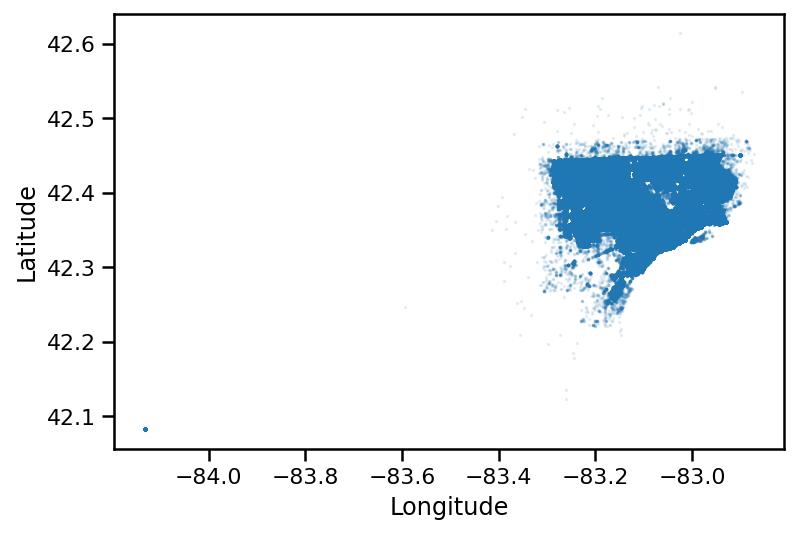

In [16]:
# Intersection locations of calls
plt.figure(figsize=(6,4))
plt.scatter(x=df["longitude"], y=df["latitude"], s=0.5, alpha=0.1)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

Strangely enough, most 911 calls records are inside Detroit city. However, there are some locations way outside of Detroit city. These are also likely the data that are null in the "neighborhood" column. These outsdie area calls should be removed.

<h3>2. Neighborhoods</h3>
<p>
    Check the list of neighborhoods in 911 calls data against the list of neighborhoods from city boundary data to make sure they match.
</p>

In [17]:
# Neighborhoods data from city.
# Create Detroit neighborhood object
detroit = utils.neighborhoods.neighborhoods("data/raw/neighborhoods.csv")
# Number of neighborhoods from city boundary data
print("Num of neighborhoods from city data:\t", detroit.num_nhood)
print("Num of neighborhoods from 911 calls:\t", df["neighborhood"].nunique())

Num of neighborhoods from city data:	 208
Num of neighborhoods from 911 calls:	 207


<p>
    Note that there is discrepancy between the number of neighborhoods from the city boundary data and 911 records.<br>
    After further looking, it was found that in city neighborhood records FID of 174 and 205 have the same neighborhood name "Oak Grove". However, 911 calls records do not include neighborhood FIDs but only their names. Therefore, need to update 911 calls dataframe with FID labels instead of using neighborhood names. For all calls from neighborhood "Oak Grove", they will be relabeled into two neighborhoods (with FID included).
</p>

<h3>3. Categories of calls</h3>

In [18]:
# Inspect unique call categories
df["category"].unique()

array(['INVPERS ', 'UNKPROB ', 'SPCL ATT', 'ACCUNK  ', 'REMARKS ',
       'DV A/B  ', 'TRF STOP', 'STRTSHFT', 'MISSSER ', 'LARCREPT',
       'UDAAREPT', 'FRAUDRPT', 'SUICIP  ', 'SHOTS IP', 'FRAUDIP ',
       'SUICTHRT', 'DISTURB ', 'TRAFF2  ', 'MISSRPT ', 'WBC     ',
       'BLDGCHK ', 'ABRPT   ', 'PANIC   ', 'BBUGIP  ', 'HOLDUP  ',
       'LARCENY ', 'MISCTRAF', 'ALRUNK  ', 'MNTLNARM', 'HRINJ   ',
       'VERALRM ', 'AB IP/JH', 'TOW     ', 'MDPRPT  ', 'WEAPON  ',
       'HI1 I/P ', 'LOSTPROP', 'PPOIP   ', 'AO      ', 'PARK    ',
       'ACCINJ  ', 'RNAIP   ', 'RAPE    ', 'TRAFF1  ', 'INVAUTO ',
       'HRUNK   ', 'DV F/A R', 'HI3     ', 'VICANML ', 'ARSNREPT',
       'INFORPT ', 'UDAAIP  ', 'FA RPT  ', 'FA IP   ', 'RNAREPT ',
       'RAIP    ', 'OD      ', 'MNTLARM ', 'HI2RPT  ', 'GSWCUT  ',
       'HI2IP   ', 'FELONY  ', 'FA JH   ', 'THREATRP', 'AIDMOTR ',
       'HI2JH   ', 'OVR     ', 'GSWRPT  ', 'AB      ', 'ACCREPT ',
       'HRREPT  ', 'BUS BRD ', 'DV AB RP', 'HARASS  ', 'PRS WE

Note that the categories lables has fixed char width, which results in trailing white spaces in the labels. This can be annoying to work with. Therefore, I will remove the leading and trailing white spaces

In [19]:
# Strip leading and trailing white spaces in the category column
df["category"] = df["category"].apply(lambda x: x.strip(" "))

In [20]:
# Calls categories and their representative description
categories = df[["category", "calldescription"]].groupby(by=["category"]).agg("first")
categories

,calldescription
category,
AB,ASSAULT AND BATTERY
AB IP/JH,ASSAULT AND BATTERY
ABRPT,ASSAULT AND BATTERY REPORT
ABUSE,CHILD / ADULT ABUSE
ABUSERPT,CHILD / ADULT ABUSE REPORT
...,...
WIRES,POWER LINES
WPNRPT,PERSON W/ A WEAPON REPORT
WSPDFIRE,WSPD - FIRES


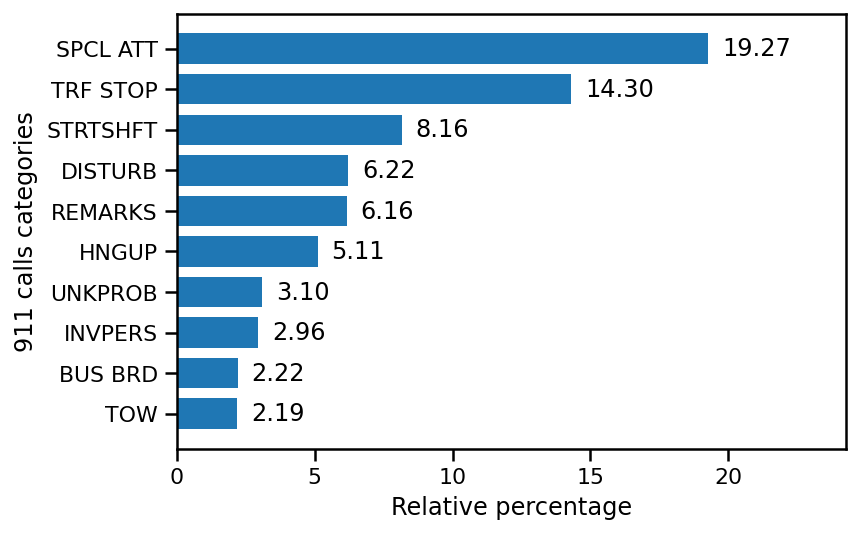

In [21]:
# 911 call categories relative percentage
data = df["category"].value_counts(normalize=True)*100
# Plot relative percent of call categories
# Only showing the top 10 categories
data = data[:10][::-1] # ascending order
plt.figure()
plt.barh(y=data.index, width=data.values, height=0.75)
plt.xlim((0,max(data.values)+5))
plt.xlabel("Relative percentage")
plt.ylabel("911 calls categories")
# labels the bar with values
for i, v in enumerate(data.values):
    plt.text(v+0.5, i, f"{v:.2f}", verticalalignment="center")
plt.show()

<p>
    Note that alot of 911 calls are for special attention (SPCL ATT). Further looking also show that for SPCL ATT, almost all the calls were initiated by field officers instead by local residents.<br>
    The 2nd highest calls category is traffic stops (TRF STOP). These calls are also all initiated by field officers.
</p>

<h3>4. Priority rating of calls</h3>

In [22]:
df["priority"].value_counts()

3    1140075
2     490996
1     181333
4      71375
5      25006
         506
P        417
Name: priority, dtype: int64

Note that the priority column is of object type, due to value "P" and " ". 

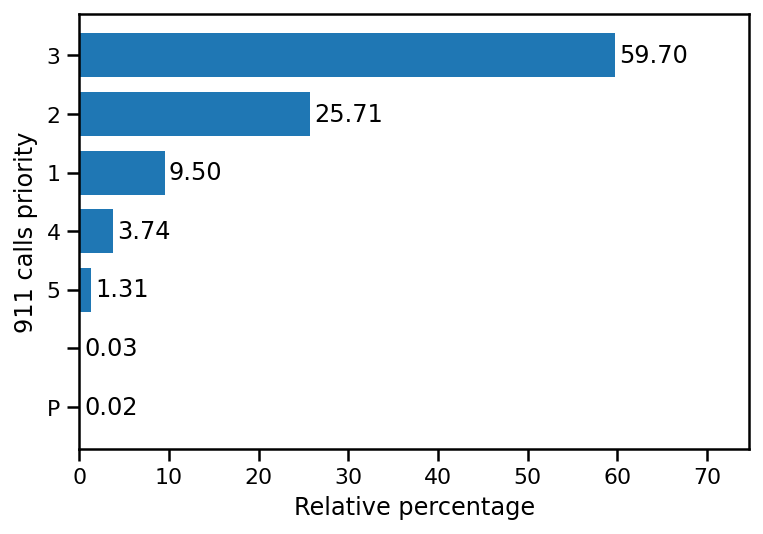

In [23]:
# 911 call categories
data = df["priority"].value_counts(normalize=True)*100
# Plot relative percent of call priority
data = data[::-1] # ascending order
plt.figure()
plt.barh(y=data.index, width=data.values, height=0.75)
plt.xlim((0,max(data.values)+15))
plt.xlabel("Relative percentage")
plt.ylabel("911 calls priority")
# labels the bar with values
for i, v in enumerate(data.values):
    plt.text(v+0.5, i, f"{v:.2f}", verticalalignment="center")
plt.show()

Most of the 911 calls have priority 3. Also P and " " are also non-existence.

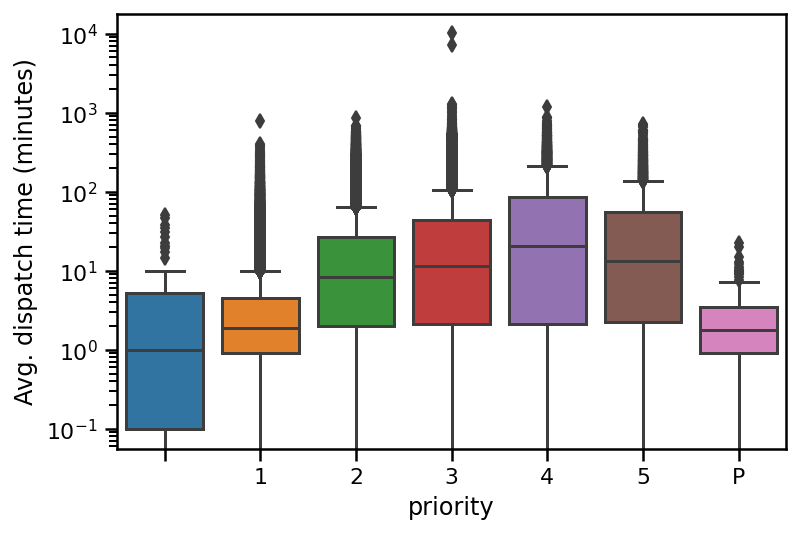

In [24]:
# Average dispatch time for each priority
# For calls NOT initiated by field offiers
data = df[(df["officerinitiated"]=="No") & (df["dispatchtime"]>=0)]
plt.figure(figsize=(6,4))
sns.boxplot(data=data, x="priority", y="dispatchtime", order=sorted(data["priority"].unique()))
plt.yscale("log")
plt.ylabel("Avg. dispatch time (minutes)")
plt.show()

<p>
    Interestingly, the dispatchtime column has alot of outlier data points. Note the log scale of the y-axis. Dispite that, in general we see that:
    <ul>
        <li>Calls with larger priority number also have longer dispatch time on average, except for priority=5 and priority=p. Due to the missing data dictionary, it is not known that priority " " and "P" represent.</li>
        <li>From this we can conclude that urgent calls are the ones with low priority numbers.</li>
    </ul>
    Since the amount of calls with priority P and " " are so small &lt0.1%. These calls can also be removed from analysis.
</p>

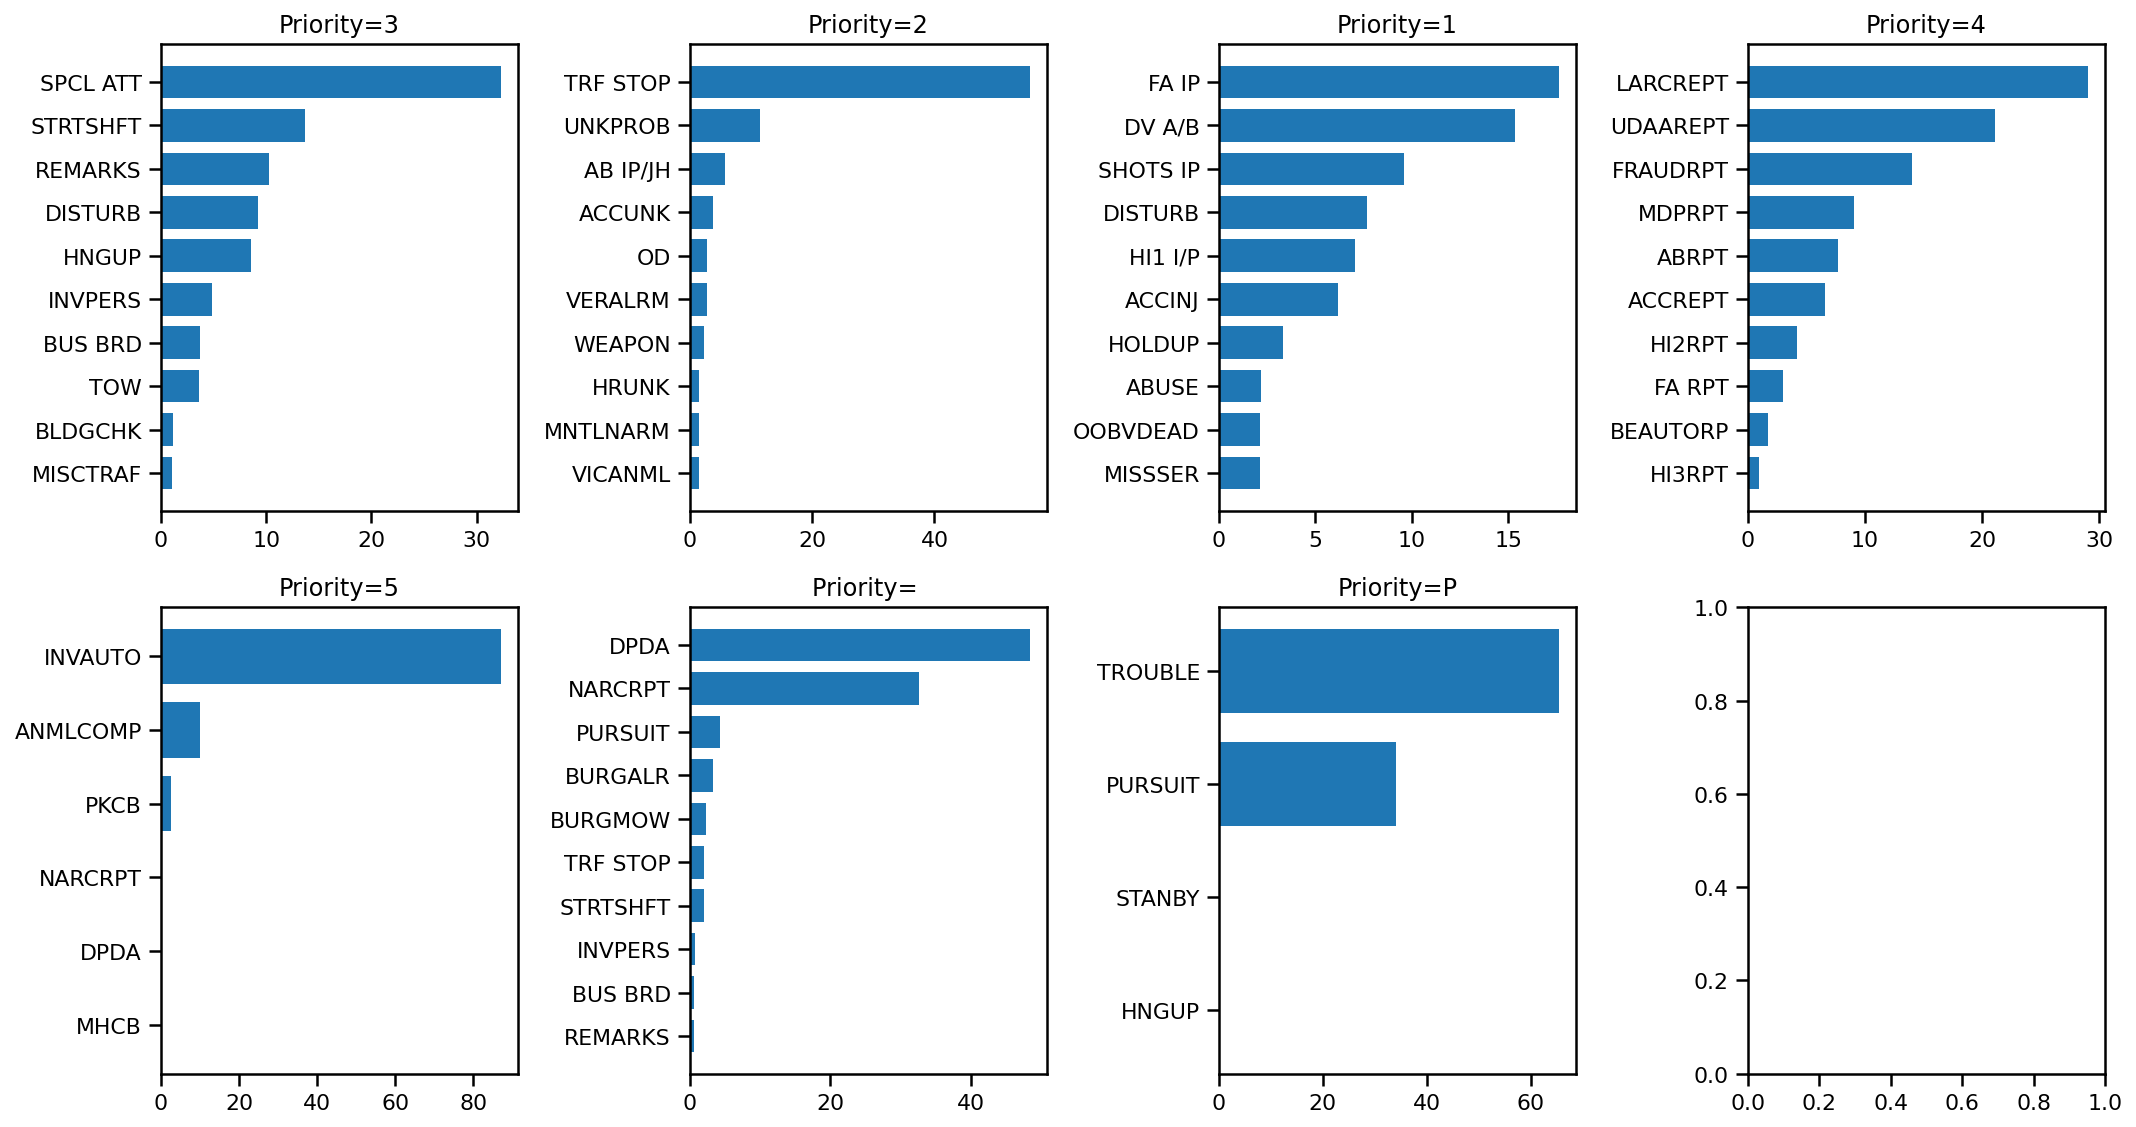

In [25]:
# Top 10 calls categories per call priority
rows = 2 # number of subplot rows
cols = 4 # number of subplot columns
fig, axes = plt.subplots(rows, cols, figsize=(15, 8)) # create subplots
row = col = 0 # initial row and column to plot on
for i, name in enumerate(df["priority"].unique()):
    data = df[df["priority"]==name]
    top_5 = (data["category"].value_counts(normalize=True)*100)[:10][::-1]
    axes[row,col].barh(y=top_5.index, width=top_5.values, height=0.75)
    axes[row,col].set_title(f"Priority={name}")
    col += 1 # next col
    if (i != 0) and (col%cols)==0: # next row
        row += 1
        col = 0
plt.tight_layout()
plt.show()    

The top 5 calls categories of each priority break down seems to agree with the above conclusion that urgent calls are the ones with low priority numbers. For instance, note that priority 1 mainly involve calls relate to assualt battery, and gun fire shots. On the other hand, priority 5 mainly involve calls relate to investiaging auto and animal complaint.

<h3>5. Total response time</h3>

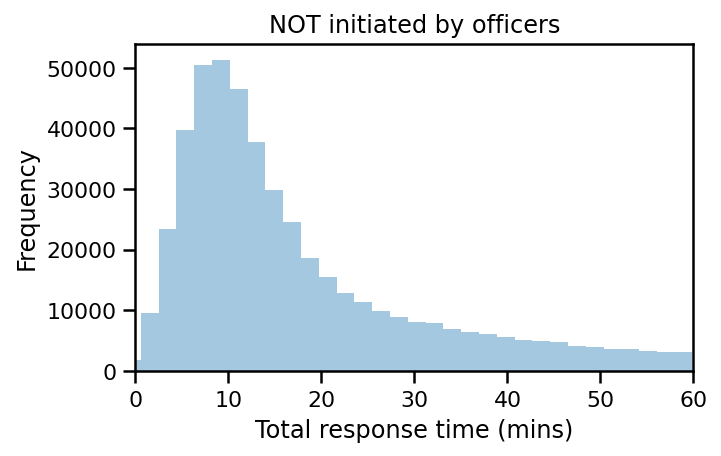

In [26]:
# totalresponsetime of call
data = df[df["officerinitiated"]=="No"]
plt.figure(figsize=(5,3))
sns.distplot(data.loc[(data.totalresponsetime<60), "totalresponsetime"], bins=60, kde=False)
plt.xlim((0,60))
plt.title("NOT initiated by officers")
plt.ylabel("Frequency")
plt.xlabel("Total response time (mins)")
plt.show()

On, average, total 911 calls response time is roughly 10 minutes. This might seems long but keep in mind that the distribution here include calls that have rather low priority (i.e. non urgent)

<hr>
<h1 style="text-align:center;">Data Processing</h1>

In [27]:
# Check nulls values
print(df.shape)
print("Percent of null values")
print("-"*50)
df.isna().mean()*100

(1909708, 27)
Percent of null values
--------------------------------------------------


X                     0.000000
Y                     0.000000
incident_id           0.000000
agency                0.000000
incident_address      2.460010
zip_code              0.000000
priority              0.000000
callcode              0.000000
calldescription       0.000000
category              0.000000
call_timestamp        0.000000
precinct_sca          0.000000
respondingunit       41.703129
officerinitiated      0.000000
intaketime            0.821592
dispatchtime          9.242146
traveltime           10.236853
totalresponsetime    10.236853
time_on_scene        10.761855
totaltime             9.732221
neighborhood          3.926045
block_id              2.462994
council_district      3.628670
longitude             0.000000
latitude              0.000000
oid                   8.517794
ObjectId             91.482206
dtype: float64

<b>CLEANING NOTES:</b>
<ul>
    <li>Drop <code>incident_address</code>, <code>council_district</code>, and <code>block_id</code> since we are looking at neighborhood level</li>
    <li>Drop <code>respondingunit</code>,<code>intaketime</code>, <code>dispatchtime</code>, <code>traveltime</code>, <code>totalresponsetime</code>, <code>time_on_scence</code>, and <code>totaltime</code> as not relevant for this study.</li>
    <li>Remove calls outside of Detroit neighborhoods</li>
    <li>Several columns string value have leading and trailing white spaces.</li>
    <li><code>priority</code> has non-numerical value (p, and " "). These data will be removed as reasoned in the EDA section.</li>
    <li><code>call_timestamp</code> should be <code>datetime64</code>.</li>
    <li>Calls belong to categories that are not related to public safety will also be removed. These include: <code>HNGUP</code>, <code>STRTSHFT</code>, <code>REMARKS</code>, <code>BUS BRD</code>, <code>TOW</code>. See EDA and calls_dictionary.txt for more detail description.</li>
    <li><b>Relabel neighborhood column</b>: to include FID and name. This is because there are 2 neighborhoods with the same name <u>"Oak Grove"</u>. For calls from "Oak Grove", the correct corresponding FID will be determine using the GPS of the calls.</li>
</ul>
<p>
    Not all categories were checked for relevant due to the large number of unique call categories (~ 192). The major categories were checked manually.
</p>
<h5><b>The above data processing steps are incorporated into the <code>preprocessing</code> module.</b></h5>

In [28]:
#*******************************
# Create Detroit neighborhood object
detroit = utils.neighborhoods.neighborhoods("data/raw/neighborhoods.csv")
# calls data preprocessing class
# Create data processing object for Detroit
data_proc = utils.preprocessing.Preprocess(detroit)

In [45]:
import pathlib

# 911 calls files to process
# Select years of data to include
years = ["2019", "2020"]
files = []
for year in years:
    # define the path
    current_directory = pathlib.Path('data/raw/Detroit_911_calls/')
    # define the filename pattern
    name_pattern = f"911_Calls_{year}*.csv"
    # Add match files to the files list
    files += [str(x) for x in current_directory.glob(name_pattern)]

# Output file
name = "_".join(years)
out_file = f"data/cleaned/911_Calls_{name}_cleaned.csv"
# Process files
data_proc.process_calls(files, out_file=out_file)

data/raw/Detroit_911_calls/911_Calls_2019_file0.csv
Raw shape:  (1007185, 26)
Keep:  (719375, 9)
--------------------------------------------------
data/raw/Detroit_911_calls/911_Calls_2020_file0.csv
Raw shape:  (739858, 26)
Keep:  (559168, 9)
--------------------------------------------------
data/raw/Detroit_911_calls/911_Calls_2020_file1.csv
Raw shape:  (78422, 26)
Keep:  (59955, 9)
--------------------------------------------------
data/raw/Detroit_911_calls/911_Calls_2020_file2.csv
Raw shape:  (83317, 26)
Keep:  (63639, 9)
--------------------------------------------------
data/raw/Detroit_911_calls/911_Calls_2020_file3.csv
Raw shape:  (84457, 26)
Keep:  (63927, 9)
--------------------------------------------------
Write to:  data/cleaned/911_Calls_2019_2020_cleaned.csv


<hr>
<h1 style="text-align: center">Feature engineering</h1>

In [46]:
# Load in cleaned data
calls = pd.read_csv("data/cleaned/911_Calls_2019_2020_cleaned.csv", thousands=",")
calls["call_timestamp"] = calls["call_timestamp"].astype("datetime64")
calls.set_index("call_timestamp", inplace=True)

In [47]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1402235 entries, 2019-01-01 00:00:54 to 2020-11-21 00:55:44
Data columns (total 9 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   incident_id       1402235 non-null  int64  
 1   officerinitiated  1402235 non-null  object 
 2   priority          1402235 non-null  int64  
 3   calldescription   1402235 non-null  object 
 4   category          1402235 non-null  object 
 5   neighborhood      1402235 non-null  object 
 6   longitude         1402235 non-null  float64
 7   latitude          1402235 non-null  float64
 8   FID_nhood         1402235 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 107.0+ MB


<h2>Attention level</h2>
<p>
    In order to have predictive police patrolling, this study aim at providing a predictive model that can forcast the police attention level needed by a neighborhood. A neighborhood attention level is defined as:
<p>

$$Attention~level_{nhood} = \left(\frac{\#~of~calls}{avg.~priority + 1}\right)+1$$

<p>Note that, 
    <ul>
        <li>adding 1 at the denominator is to avoid division by zero</li>
        <li>adding 1 on the outside is to avoid working with zero values as this can cause error with MAPE loss metrics.</li>
    </ul>
    For time series forcast, it is important the time spacing is homogeneous. Therefore,the data will need to be grouped into time interval. For the model to by dynamic and to have not too few data points per time interval, here a time interval of <b>3 hours</b> is chosen.
</p>

In [48]:
#*******************************************************
# IMPORT CUSTOM DATA OBJECT, ANALYSIS TOOLS AND FUNCTIONS
#********************************************************
from analysis import Analysis as ana

In [49]:
# selected neighborhood
#nhoods = "19,Warrendale"
nhoods = "all"
# generate attention level data with 3-hour increments
freq = "3H"
att_level = ana.get_att_level(calls, nhoods, freq=freq, data_proc=data_proc)
display(att_level)
# write time series data to file
att_level.to_csv("data/cleaned/att_lev_2019_2020_3H.csv", header=True, index=True)

,"190,Schoolcraft Southfield","40,Bagley","107,Pilgrim Village","108,Fitzgerald/Marygrove","206,Harmony Village","154,Dexter-Fenkell","168,Outer Drive-Hayes","36,Claytown","21,Warren Ave Community","169,Moross-Morang",...,"125,Happy Homes","43,Palmer Woods","122,Southfield Plymouth","84,Douglass","123,Paveway","204,Pembroke","52,Detroit Golf","163,East Canfield","158,Waterworks Park","150,Belle Isle"
call_timestamp,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,2.454545,4.047619,1.250000,1.666667,1.500000,1.500000,1.900000,3.130435,1.571429,1.900000,...,1.00,1.0,1.000000,1.0,1.0,1.0,1.000000,1.0,1.0,1.0
2019-01-01 03:00:00,1.000000,2.500000,1.333333,1.250000,3.083333,1.000000,1.900000,3.083333,4.000000,2.000000,...,1.00,1.0,1.000000,1.0,1.0,1.0,1.000000,1.0,1.0,1.0
2019-01-01 06:00:00,1.500000,1.666667,1.000000,1.200000,1.571429,1.500000,1.666667,2.000000,1.800000,1.250000,...,1.00,1.0,1.000000,1.0,1.0,1.0,1.000000,1.0,1.0,1.0
2019-01-01 09:00:00,1.500000,1.500000,1.500000,1.250000,2.500000,1.000000,1.500000,2.000000,2.333333,1.250000,...,1.00,1.0,1.000000,1.0,1.0,1.0,1.000000,1.0,1.0,1.0
2019-01-01 12:00:00,1.250000,1.571429,1.000000,1.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.800000,...,1.00,1.0,1.000000,1.0,1.0,1.0,1.000000,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-20 12:00:00,1.250000,1.500000,1.333333,1.571429,1.200000,1.000000,1.500000,2.388889,2.315789,1.818182,...,1.25,1.0,1.000000,1.0,1.0,1.0,1.000000,1.0,1.0,1.0
2020-11-20 15:00:00,1.000000,2.142857,1.000000,1.500000,1.692308,1.333333,2.800000,1.818182,1.000000,3.041667,...,1.25,1.0,1.000000,1.0,1.0,1.0,1.000000,1.0,1.0,1.0
2020-11-20 18:00:00,1.800000,2.142857,2.125000,2.000000,1.666667,1.000000,1.800000,2.000000,1.666667,1.250000,...,1.90,1.5,1.333333,1.0,1.0,1.0,1.333333,1.0,1.0,1.0
